In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# EDA

In [289]:
selected_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                    'population', 'households', 'median_income', 'median_house_value','ocean_proximity']

df = pd.read_csv('../../data/housing.csv', usecols=selected_columns)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [290]:
# Fill missing values
total_bedrooms_median = df.total_bedrooms.median()
df.total_bedrooms.fillna(total_bedrooms_median, inplace=True)

df.total_bedrooms.isna().mean()

0.0

In [291]:
# Create new columns
df['rooms_per_household'] = df.total_rooms / df.households
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['population_per_household'] = df.population / df.households

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [292]:
# Answer 1: <1H OCEAN
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [293]:
# Answer 2: total_bedrooms and household
df.corr(numeric_only=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.081205,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.098619,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.135622,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187381,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.001765,0.071649,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.010035,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.080598,0.034498,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.326895,-0.545298,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.233303,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.370308,-0.004852


In [294]:

#@ INSPECTING HEATMAP:
df_numeric = df.copy()
df_numeric.drop(["ocean_proximity", "median_house_value"], axis=1)
df_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213794,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.065248,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.037151,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175225,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203159,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.240126,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,2.824675,1243.333333


In [295]:
# Answer 2: total_bedrooms and household
df_numeric.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.081205,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.098619,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.135622,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187381,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.001765,0.071649,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.010035,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.080598,0.034498,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.326895,-0.545298,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.233303,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.370308,-0.004852


/var/folders/jr/yyrb479547l4qcrxdj0t48kc0000gn/T/ipykernel_81170/272005972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")


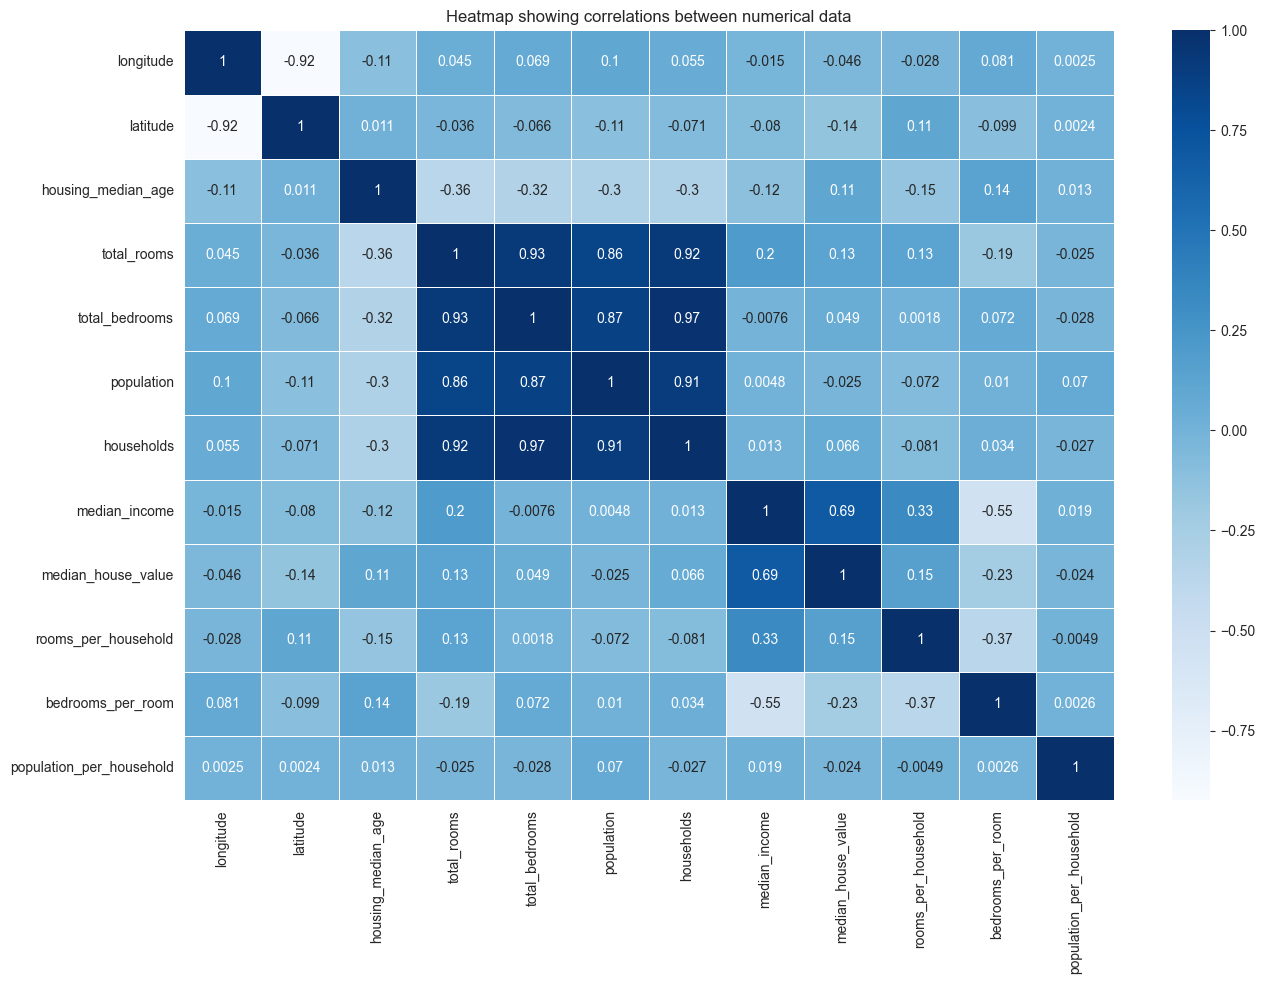

In [296]:
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [297]:
mhv_mean = df.median_house_value.mean()
df['above_average'] = (df.median_house_value > mhv_mean).astype('int')
df.above_average.value_counts()


0    12255
1     8385
Name: above_average, dtype: int64

## Split the data

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
seed = 42
df_full_train, df_test =train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

len(df_train), len(df_val), len(df_test)


(12384, 4128, 4128)

In [300]:
df_full_train.reset_index(drop=True)
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_full_train = df_full_train.above_average.values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Feature importance

In [301]:
from sklearn.metrics import mutual_info_score

In [302]:
# Answer 3: 0.10
round(mutual_info_score(df_train.above_average, df_train.ocean_proximity), 2)


0.1

In [303]:
del df_full_train['above_average']
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Logistic regression

In [304]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [305]:
num = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household",
       "bedrooms_per_room", "population_per_household"]
cat = ["ocean_proximity"]
features = cat + num

In [306]:
# Encoding
dv = DictVectorizer(sparse=False)

train_dicts = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [307]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [308]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [309]:
from sklearn.metrics import accuracy_score

In [310]:
# Answer 4: 0.84
original_accuracy = round(accuracy_score(y_val, y_pred),2)
original_accuracy

0.84

In [311]:
# Answer 5: total_bedrooms (0.004)
for c in features:
    features_subset = features.copy()
    features_subset.remove(c)
    # Encoding
    dv = DictVectorizer(sparse=False)

    train_dicts = df_train[features_subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val[features_subset].to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    # Train
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)

    print(c, original_accuracy - accuracy, accuracy)



ocean_proximity 0.019505813953488382 0.8204941860465116
longitude 0.005213178294573573 0.8347868217054264
latitude 0.0054554263565891326 0.8345445736434108
housing_median_age 0.00957364341085265 0.8304263565891473
total_rooms 0.0030329457364340895 0.8369670542635659
total_bedrooms 0.004486434108527115 0.8355135658914729
population 0.013691860465116279 0.8263081395348837
households 0.00642441860465115 0.8335755813953488
median_income 0.05463178294573645 0.7853682170542635
rooms_per_household 0.003759689922480547 0.8362403100775194
bedrooms_per_room 0.004728682170542564 0.8352713178294574
population_per_household 0.0042441860465115555 0.8357558139534884


## Linear regression

In [312]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [313]:
df.median_house_value = np.log1p(df.median_house_value)

In [314]:
seed = 42
df_full_train, df_test =train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [315]:
df_full_train.reset_index(drop=True)
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_full_train = df_full_train.median_house_value.values
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

y_val

array([11.47937902, 11.23190118, 12.97363364, ..., 12.74898107,
       12.8682476 , 12.12378283])

In [316]:
del df_full_train['median_house_value']
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [317]:
for r in [0, 0.01, 0.1, 1, 10]:
        # Encoding
        dv = DictVectorizer(sparse=False)

        train_dicts = df_train[features].to_dict(orient='records')
        X_train = dv.fit_transform(train_dicts)

        val_dicts = df_val[features].to_dict(orient='records')
        X_val = dv.transform(val_dicts)

        model = Ridge(alpha=r, solver="sag", random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        print(r, round(np.sqrt(mean_squared_error(y_val, y_pred)), 3))


/Users/gastonamestoy/.local/share/virtualenvs/mlbookcamp-Wh4lzSE1/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.523


/Users/gastonamestoy/.local/share/virtualenvs/mlbookcamp-Wh4lzSE1/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.523


/Users/gastonamestoy/.local/share/virtualenvs/mlbookcamp-Wh4lzSE1/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.523


/Users/gastonamestoy/.local/share/virtualenvs/mlbookcamp-Wh4lzSE1/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.523
10 0.523


/Users/gastonamestoy/.local/share/virtualenvs/mlbookcamp-Wh4lzSE1/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
